In [1]:
from GradCam import GradCam

from torchvision import models as pretrained
from PIL import Image, ImageDraw

from typing import List, Union

import torch

from IPython.display import display
import numpy as np
from imagenet_classes import classes

/home2/aa_aanegola/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
model = pretrained.vgg19(pretrained=True)
gc = GradCam(model, model.features[35], device)

In [4]:
image = Image.open('./sample_images/dog_and_cat.jpeg')
labels = gc.topk(image, 6)
for lab in labels:
    print(lab, classes[lab])


260 chow, chow chow
207 golden retriever
186 Norwich terrier
273 dingo, warrigal, warragal, Canis dingo
185 Norfolk terrier
281 tabby, tabby cat


In [6]:
hm_cat = gc(image, torch.tensor([281]))
hm_dog = gc(image, torch.tensor([207]))

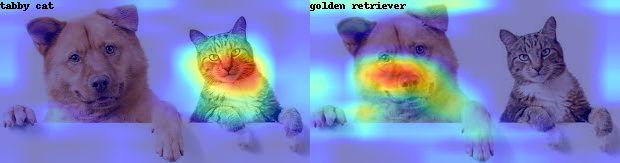

In [7]:
ImageDraw.Draw(hm_cat).text((0, 0), "tabby cat", (0, 0, 0))
ImageDraw.Draw(hm_dog).text((0, 0), "golden retriever", (0, 0, 0))
heatmaps = Image.fromarray(np.hstack([np.array(hm) for hm in [hm_cat, hm_dog]]))
display(heatmaps)